# Pre-alignment Workflow

<!--NAVIGATION-->
| [Contents](Index.ipynb) | [Quality Control](01.01-prealn-wf_qc.ipynb) >

In [1]:
import os
import sys

import numpy as np
import pandas as pd

from IPython.display import Image

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from ncbi_remap.notebook import Nb
from ncbi_remap.plotting import make_figs

# Setup notebook
nbconfig = Nb.setup_notebook()

# Turn on cache
from joblib import Memory
memory = Memory(cachedir=nbconfig.cache, verbose=0)

# Connect to data store
store = pd.HDFStore('../sra.h5', mode='r')

last updated: 2017-12-09 
Git hash: 9226a45f8c7528e964875f37bfe0e2441ad3d40e


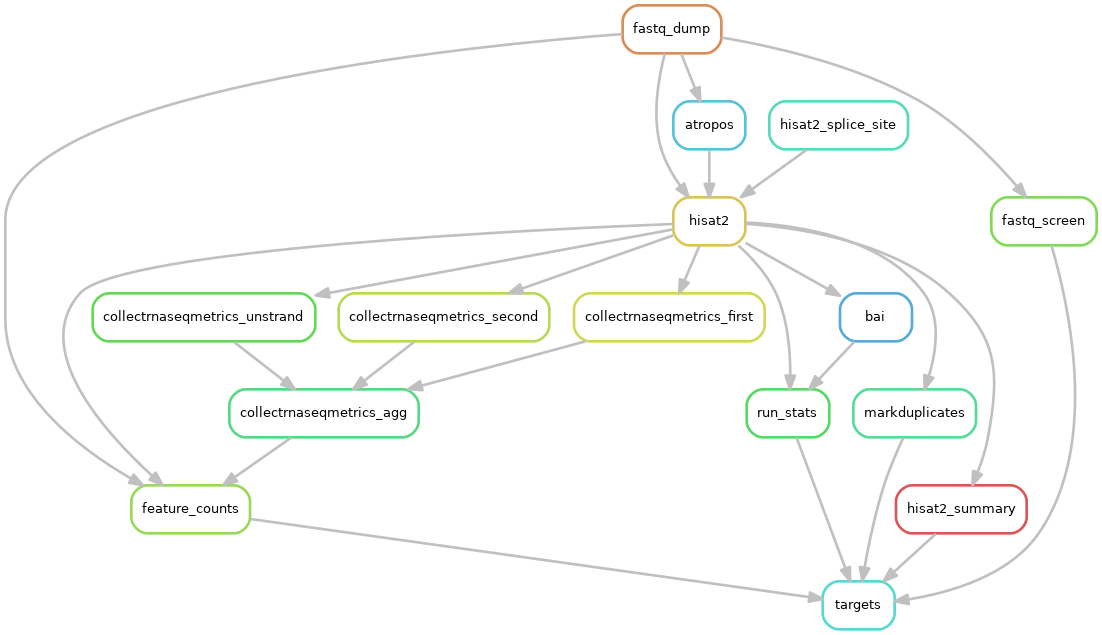

In [2]:
# DAG
Image('../output/figures/prealn-wf_dag.png')

In [3]:
# Counts
def fnum(x):
    return "{:,}".format(x)

num_pe = fnum(store['layout/PE'].shape[0])
num_r1 = fnum(store['layout/keep_R1'].shape[0])
num_r2 = fnum(store['layout/keep_R2'].shape[0])
num_r1_r2 =  fnum(store['layout/keep_R1'].shape[0] + store['layout/keep_R2'].shape[0])
num_se = fnum(store['layout/SE'].shape[0])
num_bad = fnum(store['prealn/download_bad'].shape[0])

## Download
Two major challenges of using public data is identifying quality datasets and verifying associated metadata. The sequence read archive (SRA) has limited curation and accepts a wide range of sequencing data, making it necessary for the end user to set criteria and validate necessary metadata. To address these issues we developed a pre-alignment workflow (pictured above). FASTQs files are downloaded using `fastq-dump`, pair-ended FASTQs are split into two separate files (`--split-files`). The md5sum of each file is calculated along with library size (number of reads) and average read length. For single-end runs, a download is considered successful if there are more than 1,000 reads and an average read length greater than 10 bp. For pair-ended runs, both sets of reads are evaluated. If both R1 and R2 meet these criteria (more than 1,000 reads and average read length greater than 10 bp) the download is considered successful and the run is considered pair-end for remaining analysis. If only R1 or R2 met these criteria then the run is considered single-ended and the other read is ignored. If both R1 and R2 fail to meet these criteria then the download is considered failed.

### Download Criteria
* ≥1,000 reads
* ≥10 bp average read length


### Download Summary
* Number Single-End: {{num_se}}
* Number Pair-Ended: {{num_pe}}
* Number Pair-Ended treated as SE: {{num_r1_r2}}
    * Read 1 Good: {{num_r1}}
    * Read 2 Good: {{num_r2}}
* Number Download Failed: {{num_bad}}

## Quality control, merging libraries, technical metadata

* [Quality Control](prealn-wf_qc.ipynb)
* [Merging Libraries](prealn-merge_srr.ipynb)
* [Technical Metadata](prealn-technology.ipynb)

<!--NAVIGATION-->
| [Contents](Index.ipynb) | [Quality Control](01.01-prealn-wf_qc.ipynb) >